In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# Predict classes using the model
predictions = model.predict(X_test)

# Find the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)

# Now you can use predicted_classes for further analysis or evaluation

pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)



Epoch 1/15


981/981 [==============================] - 49s 46ms/step - loss: 1.8375 - accuracy: 0.5530 - val_loss: 0.3093 - val_accuracy: 0.9239
Epoch 2/15
981/981 [==============================] - 50s 51ms/step - loss: 0.5010 - accuracy: 0.8617 - val_loss: 0.1675 - val_accuracy: 0.9652
Epoch 3/15
981/981 [==============================] - 46s 47ms/step - loss: 0.3133 - accuracy: 0.9132 - val_loss: 0.0760 - val_accuracy: 0.9792
Epoch 4/15
981/981 [==============================] - 45s 46ms/step - loss: 0.2409 - accuracy: 0.9342 - val_loss: 0.0841 - val_accuracy: 0.9762
Epoch 5/15
981/981 [==============================] - 45s 46ms/step - loss: 0.2414 - accuracy: 0.9360 - val_loss: 0.0501 - val_accuracy: 0.9869
Epoch 6/15
981/981 [==============================] - 58s 59ms/step - loss: 0.2050 - accuracy: 0.9452 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 7/15
981/981 [============================

C:\Users\Arpita\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


395/395 [==============================] - 5s 13ms/step


AttributeError: 'Sequential' object has no attribute 'predict_classes'

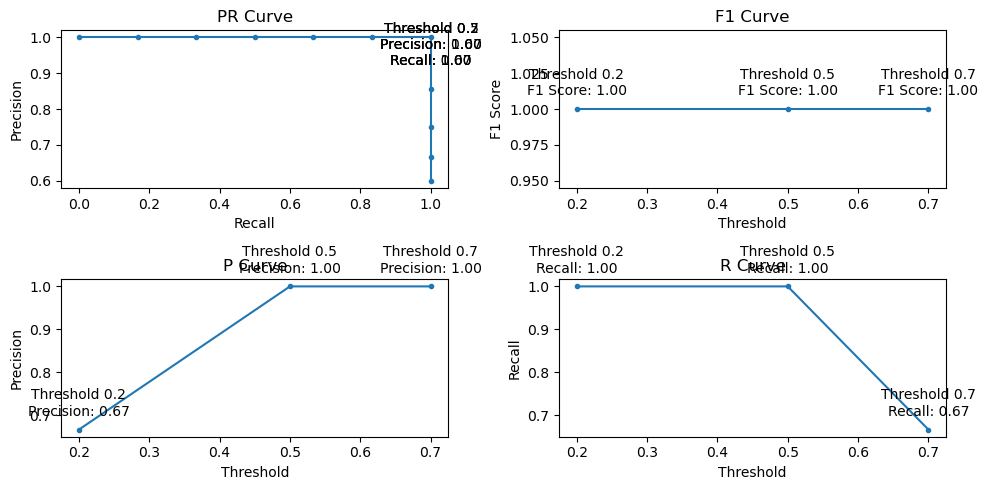

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

# Example true labels and predicted probabilities
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
y_scores = [0.2, 0.8, 0.6, 0.3, 0.7, 0.1, 0.9, 0.4, 0.65, 0.85]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Calculate F1 score
f1 = f1_score(y_true, [1 if score >= 0.5 else 0 for score in y_scores])

# Calculate precision and recall values at specific thresholds
thresholds = [0.2, 0.5, 0.7]
prec_at_thresholds = [precision_score(y_true, [1 if score >= th else 0 for score in y_scores]) for th in thresholds]
rec_at_thresholds = [recall_score(y_true, [1 if score >= th else 0 for score in y_scores]) for th in thresholds]

# Plot PR Curve
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
for i, txt in enumerate(thresholds):
    plt.annotate(f'Threshold {txt}\nPrecision: {prec_at_thresholds[i]:.2f}\nRecall: {rec_at_thresholds[i]:.2f}',
                 (recall[np.argmax(precision)], precision[np.argmax(precision)]), xytext=(0.5, -20),
                 textcoords='offset points', ha='center')

# Plot F1 Curve
plt.subplot(2, 2, 2)
plt.plot(thresholds, [f1] * len(thresholds), marker='.')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
for i, txt in enumerate(thresholds):
    plt.annotate(f'Threshold {txt}\nF1 Score: {f1:.2f}',
                 (thresholds[i], f1), xytext=(0, 10),
                 textcoords='offset points', ha='center')

# Plot P Curve
plt.subplot(2, 2, 3)
plt.plot(thresholds, prec_at_thresholds, marker='.')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('P Curve')
for i, txt in enumerate(thresholds):
    plt.annotate(f'Threshold {txt}\nPrecision: {prec_at_thresholds[i]:.2f}',
                 (thresholds[i], prec_at_thresholds[i]), xytext=(0, 10),
                 textcoords='offset points', ha='center')

# Plot R Curve
plt.subplot(2, 2, 4)
plt.plot(thresholds, rec_at_thresholds, marker='.')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('R Curve')
for i, txt in enumerate(thresholds):
    plt.annotate(f'Threshold {txt}\nRecall: {rec_at_thresholds[i]:.2f}',
                 (thresholds[i], rec_at_thresholds[i]), xytext=(0, 10),
                 textcoords='offset points', ha='center')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 33ms/step
Processing time for one image: 0.10018706321716309 seconds


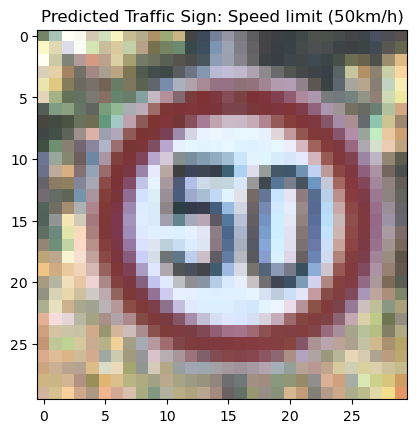

Predicted Traffic Sign: Speed limit (50km/h)


In [9]:
import time

# Define a function to classify a traffic sign and measure processing time
def classify_traffic_sign_with_time(image_path):
    try:
        start_time = time.time()  # Start time measurement
        image = Image.open(image_path)
        image = image.resize((30, 30))
        image = np.expand_dims(image, axis=0)
        image = np.array(image)
        predictions = model.predict(image)
        
        predicted_class = np.argmax(predictions, axis=-1)
        sign = classes.get(predicted_class[0] + 1, "Unknown")
        
        end_time = time.time()  # End time measurement
        processing_time = end_time - start_time  # Calculate processing time
        print(f"Processing time for one image: {processing_time} seconds")
        
        plt.imshow(image[0])
        plt.title(f'Predicted Traffic Sign: {sign}')
        plt.show()
        
        return sign, processing_time
    except Exception as e:
        return f"Classification error: {str(e)}", None

# Replace 'your_image_path.jpg' with the actual path to your image
image_path = '00034.png'

# Call the function to classify the image and measure processing time
result, processing_time = classify_traffic_sign_with_time(image_path)
print(f'Predicted Traffic Sign: {result}')


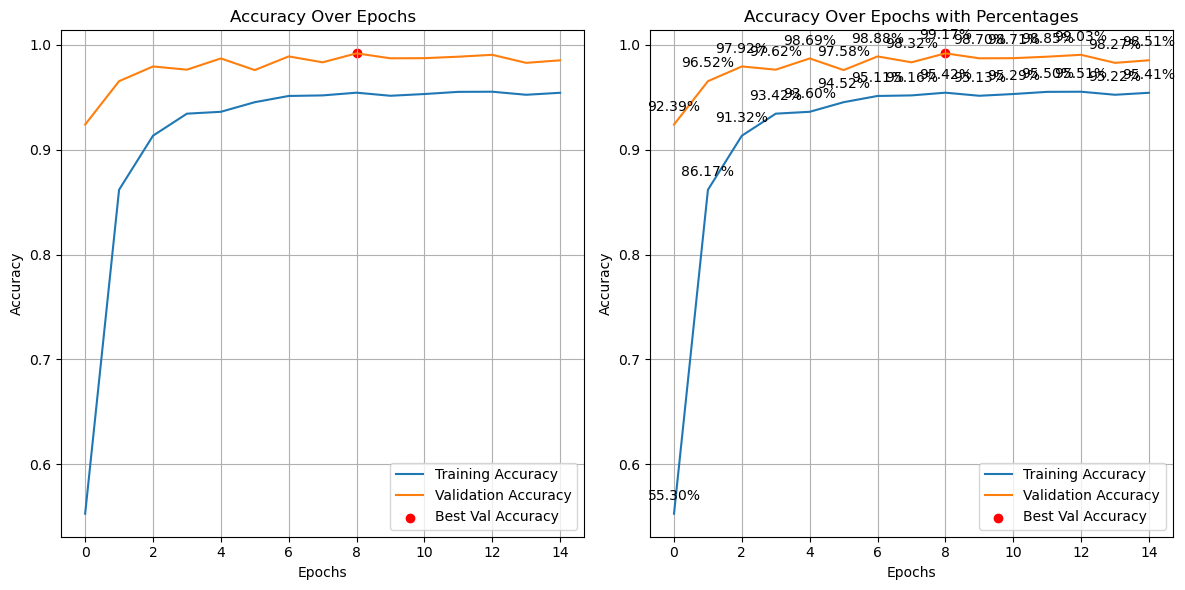

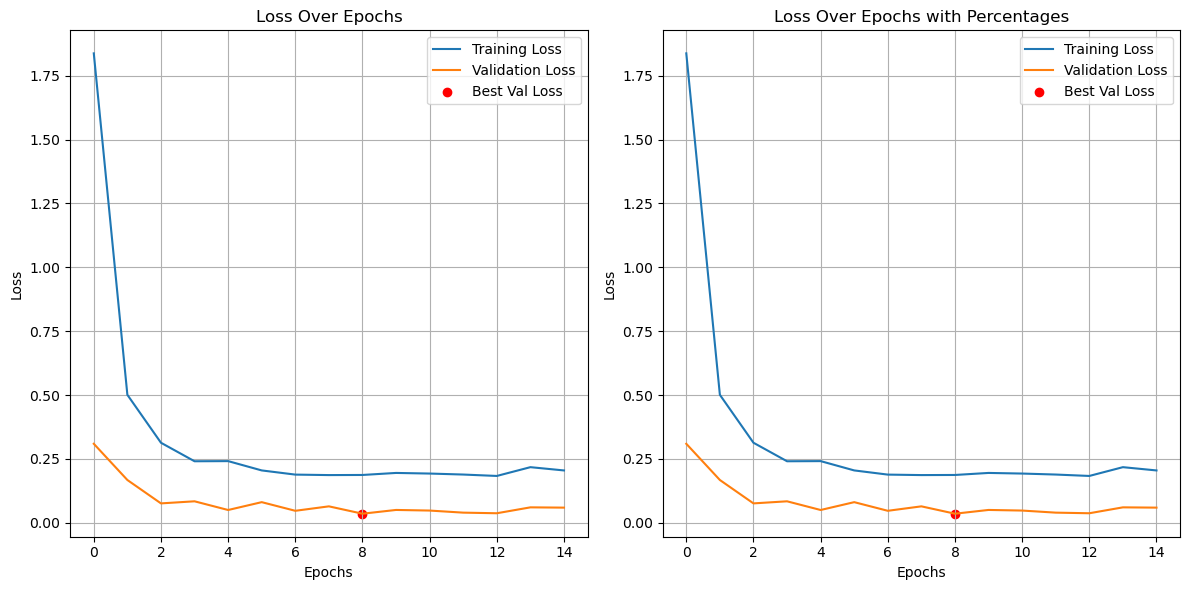

In [2]:



# Find index of the epoch with the highest validation accuracy
best_val_accuracy_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter([best_val_accuracy_epoch], [max(history.history['val_accuracy'])], color='red', marker='o', label='Best Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adding accuracy numbers as percentages
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter([best_val_accuracy_epoch], [max(history.history['val_accuracy'])], color='red', marker='o', label='Best Val Accuracy')
plt.title('Accuracy Over Epochs with Percentages')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Displaying accuracy as percentages
acc_percentage = [f'{acc * 100:.2f}%' for acc in history.history['accuracy']]
val_acc_percentage = [f'{acc * 100:.2f}%' for acc in history.history['val_accuracy']]

for i, txt in enumerate(acc_percentage):
    plt.annotate(txt, (i, history.history['accuracy'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

for i, txt in enumerate(val_acc_percentage):
    plt.annotate(txt, (i, history.history['val_accuracy'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

# Plotting loss
plt.figure(figsize=(12, 6))

best_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter([best_val_loss_epoch], [min(history.history['val_loss'])], color='red', marker='o', label='Best Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adding accuracy numbers as percentages
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter([best_val_loss_epoch], [min(history.history['val_loss'])], color='red', marker='o', label='Best Val Loss')
plt.title('Loss Over Epochs with Percentages')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 39ms/step


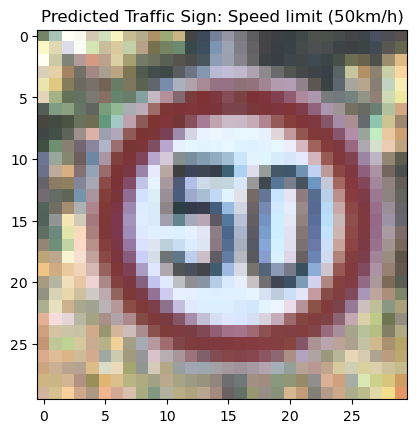

Predicted Traffic Sign: Speed limit (50km/h)


In [6]:

from PIL import Image
import numpy as np
from keras.models import load_model


# Dictionary to label all traffic sign classes
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
}


# Define a function to classify a traffic sign
def classify_traffic_sign(image_path):
    try:
        image = Image.open(image_path)
        image = image.resize((30, 30))
        image = np.expand_dims(image, axis=0)
        image = np.array(image)
        predictions = model.predict(image)
        
        predicted_class = np.argmax(predictions, axis=-1)
        sign = classes.get(predicted_class[0] + 1, "Unknown")
        plt.imshow(image[0])
        plt.title(f'Predicted Traffic Sign: {sign}')
        plt.show()
        return sign
    except Exception as e:
        return f"Classification error: {str(e)}"

# Replace 'your_image_path.jpg' with the actual path to your image
image_path = '00034.png'

# Call the function to classify the image
result = classify_traffic_sign(image_path)
print(f'Predicted Traffic Sign: {result}')
